In [1]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
import PyPDF2
from io import BytesIO

# Exploring Data

In [2]:
# Importing treatment Episode Discharge Dataset

teds_data = pd.read_csv("C:/Users/patri/Desktop/Capstone 2 - Predicting Treatment Success/data/tedsd_puf_2020.csv")

teds_data.head()


,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2020,1243074,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
1,2020,1168758,2,-9,3,2,7,-9,29,1,...,0,0,0,0,0,0,9,4,0,1
2,2020,1150846,2,-9,1,1,7,-9,36,1,...,0,0,0,0,0,0,9,4,0,3
3,2020,1121864,2,-9,3,2,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2020,1180820,2,-9,3,2,7,-9,36,1,...,0,0,0,0,0,0,9,4,0,3


In [3]:
column_names = teds_data.columns.tolist()

# Print the column names in a column format
for column in column_names:
    print(column)

DISYR
CASEID
STFIPS
CBSA2010
EDUC
MARSTAT
SERVICES
DETCRIM
LOS
PSOURCE
NOPRIOR
ARRESTS
EMPLOY
METHUSE
PSYPROB
PREG
GENDER
VET
LIVARAG
DAYWAIT
SERVICES_D
REASON
EMPLOY_D
LIVARAG_D
ARRESTS_D
DSMCRIT
AGE
RACE
ETHNIC
DETNLF
DETNLF_D
PRIMINC
SUB1
SUB2
SUB3
SUB1_D
SUB2_D
SUB3_D
ROUTE1
ROUTE2
ROUTE3
FREQ1
FREQ2
FREQ3
FREQ1_D
FREQ2_D
FREQ3_D
FRSTUSE1
FRSTUSE2
FRSTUSE3
HLTHINS
PRIMPAY
FREQ_ATND_SELF_HELP
FREQ_ATND_SELF_HELP_D
ALCFLG
COKEFLG
MARFLG
HERFLG
METHFLG
OPSYNFLG
PCPFLG
HALLFLG
MTHAMFLG
AMPHFLG
STIMFLG
BENZFLG
TRNQFLG
BARBFLG
SEDHPFLG
INHFLG
OTCFLG
OTHERFLG
DIVISION
REGION
IDU
ALCDRUG


In [4]:
teds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391393 entries, 0 to 1391392
Data columns (total 76 columns):
 #   Column                 Non-Null Count    Dtype
---  ------                 --------------    -----
 0   DISYR                  1391393 non-null  int64
 1   CASEID                 1391393 non-null  int64
 2   STFIPS                 1391393 non-null  int64
 3   CBSA2010               1391393 non-null  int64
 4   EDUC                   1391393 non-null  int64
 5   MARSTAT                1391393 non-null  int64
 6   SERVICES               1391393 non-null  int64
 7   DETCRIM                1391393 non-null  int64
 8   LOS                    1391393 non-null  int64
 9   PSOURCE                1391393 non-null  int64
 10  NOPRIOR                1391393 non-null  int64
 11  ARRESTS                1391393 non-null  int64
 12  EMPLOY                 1391393 non-null  int64
 13  METHUSE                1391393 non-null  int64
 14  PSYPROB                1391393 non-null  int64
 15

In [5]:
# Examining the demographic characteristics
demographics = teds_data[["GENDER", "AGE", "ETHNIC", "RACE", "EDUC", "MARSTAT"]]

for column in demographics.columns:
    freq_dist = demographics[column].value_counts().sort_index()
    print(f"Frequency distribution for {column}:\n{freq_dist}\n")


Frequency distribution for GENDER:
-9       631
 1    896332
 2    494430
Name: GENDER, dtype: int64

Frequency distribution for AGE:
1       6186
2      25106
3      33661
4      98374
5     223285
6     251257
7     211265
8     153439
9     119315
10    111558
11    136766
12     21181
Name: AGE, dtype: int64

Frequency distribution for ETHNIC:
-9      56918
 1      44031
 2      50559
 3      41000
 4    1164139
 5      34746
Name: ETHNIC, dtype: int64

Frequency distribution for RACE:
-9     59968
 1      3180
 2     39725
 3       307
 4    235811
 5    920912
 6      7767
 7     93391
 8     23385
 9      6947
Name: RACE, dtype: int64

Frequency distribution for EDUC:
-9    180967
 1     67160
 2    239783
 3    590300
 4    240980
 5     72203
Name: EDUC, dtype: int64

Frequency distribution for MARSTAT:
-9    312966
 1    718324
 2    135852
 3     61224
 4    163027
Name: MARSTAT, dtype: int64



In [6]:
# Examining primary dependent variable "Reason for discharge"
reason_count = teds_data["REASON"].value_counts().sort_index()
reason_count

1    589879
2    341002
3     69178
4    311705
5     15447
6      4153
7     60029
Name: REASON, dtype: int64

In [7]:
# Examining missing values, -9 represent missing values, replacing with NA
# Define the indicator of missing values
missing_indicator = -9

# Calculate the missing percentage for each row
row_missing_percentage = (teds_data == missing_indicator).sum(axis=1) / teds_data.shape[1] * 100

# Add the missing percentage as a new column in the DataFrame
teds_data["Missing_Percentage"] = row_missing_percentage

sorted_teds_data = teds_data.sort_values(by="Missing_Percentage", ascending=False)
print(sorted_teds_data.head())


         DISYR   CASEID  STFIPS  CBSA2010  EDUC  MARSTAT  SERVICES  DETCRIM  \
1383298   2020  1310097      53        -9    -9       -9         2       -9   
1381041   2020  1246496      53        -9    -9       -9         2       -9   
584383    2020   857877      22        -9    -9       -9         7       -9   
1382860   2020  1301863      53        -9    -9       -9         7       -9   
589256    2020   749207      22        -9    -9       -9         7       -9   

         LOS  PSOURCE  ...  BARBFLG  SEDHPFLG  INHFLG  OTCFLG  OTHERFLG  \
1383298   34       -9  ...        0         0       0       0         0   
1381041   34       -9  ...        0         0       0       0         0   
584383    37       -9  ...        0         0       0       0         0   
1382860   10       -9  ...        0         0       0       0         0   
589256    36       -9  ...        0         0       0       0         0   

         DIVISION  REGION  IDU  ALCDRUG  Missing_Percentage  
1383298     

In [8]:
# Exammining individuals visits with more than 50% data missing
sorted_teds_data_50_missing = sorted_teds_data[sorted_teds_data['Missing_Percentage'] > 50]
print(sorted_teds_data_50_missing)

         DISYR   CASEID  STFIPS  CBSA2010  EDUC  MARSTAT  SERVICES  DETCRIM  \
1383298   2020  1310097      53        -9    -9       -9         2       -9   
1381041   2020  1246496      53        -9    -9       -9         2       -9   
584383    2020   857877      22        -9    -9       -9         7       -9   
1382860   2020  1301863      53        -9    -9       -9         7       -9   
589256    2020   749207      22        -9    -9       -9         7       -9   
...        ...      ...     ...       ...   ...      ...       ...      ...   
1383230   2020  1300508      53        -9    -9       -9         7       -9   
1383196   2020  1308911      53        -9    -9       -9         7       -9   
1383198   2020  1294620      53        -9    -9       -9         7       -9   
509296    2020   140485      20        -9    -9       -9         4       -9   
1382481   2020  1350892      53        -9    -9       -9         4       -9   

         LOS  PSOURCE  ...  BARBFLG  SEDHPFLG  INHF

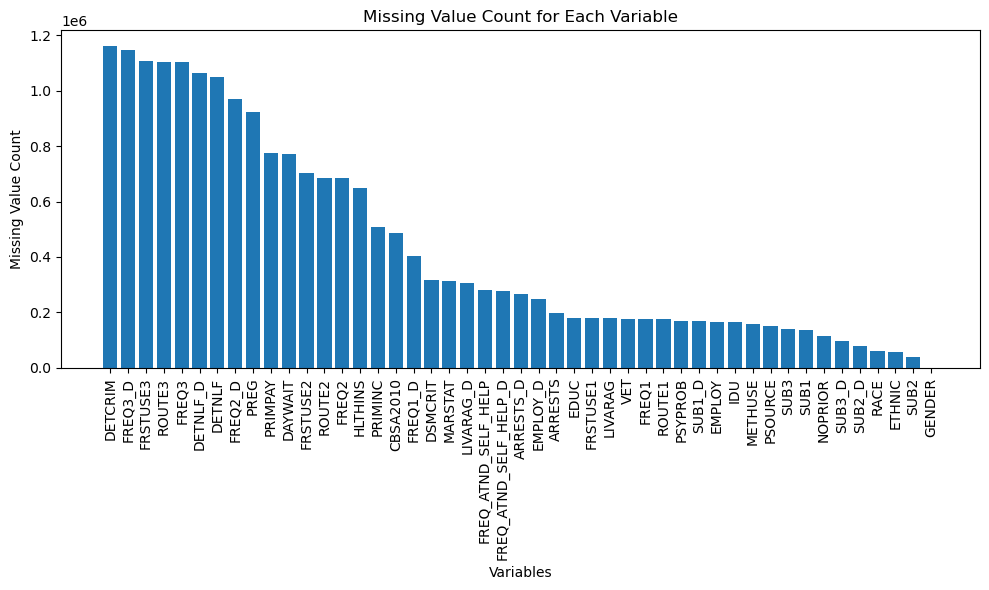

In [9]:
# Plotting these missing values by variable 

# Calculate missing value counts
missing_counts = (teds_data == -9).sum()

# Filter out variables with no missing values
missing_counts = missing_counts[missing_counts > 0]

# Sort the missing value counts in descending order
missing_counts = missing_counts.sort_values(ascending=False)

# Create a bar plot for missing value counts
plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Count for Each Variable')
plt.tight_layout()
plt.show()

Variables such as "Detailed criminal justice referral" have very high missing count and will be dropped.

In [10]:
# Reading the documentation, it was observed that TEDS-D includes all admissions/discharges rather than individuals.
# Hence, I will include records that indicate the individual had no prior SUD treatment were included in the analyses to capture individuals

teds_no_prior = teds_data[teds_data['NOPRIOR'] == 0]
teds_no_prior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503107 entries, 0 to 1391392
Data columns (total 77 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DISYR                  503107 non-null  int64  
 1   CASEID                 503107 non-null  int64  
 2   STFIPS                 503107 non-null  int64  
 3   CBSA2010               503107 non-null  int64  
 4   EDUC                   503107 non-null  int64  
 5   MARSTAT                503107 non-null  int64  
 6   SERVICES               503107 non-null  int64  
 7   DETCRIM                503107 non-null  int64  
 8   LOS                    503107 non-null  int64  
 9   PSOURCE                503107 non-null  int64  
 10  NOPRIOR                503107 non-null  int64  
 11  ARRESTS                503107 non-null  int64  
 12  EMPLOY                 503107 non-null  int64  
 13  METHUSE                503107 non-null  int64  
 14  PSYPROB                503107 non-n

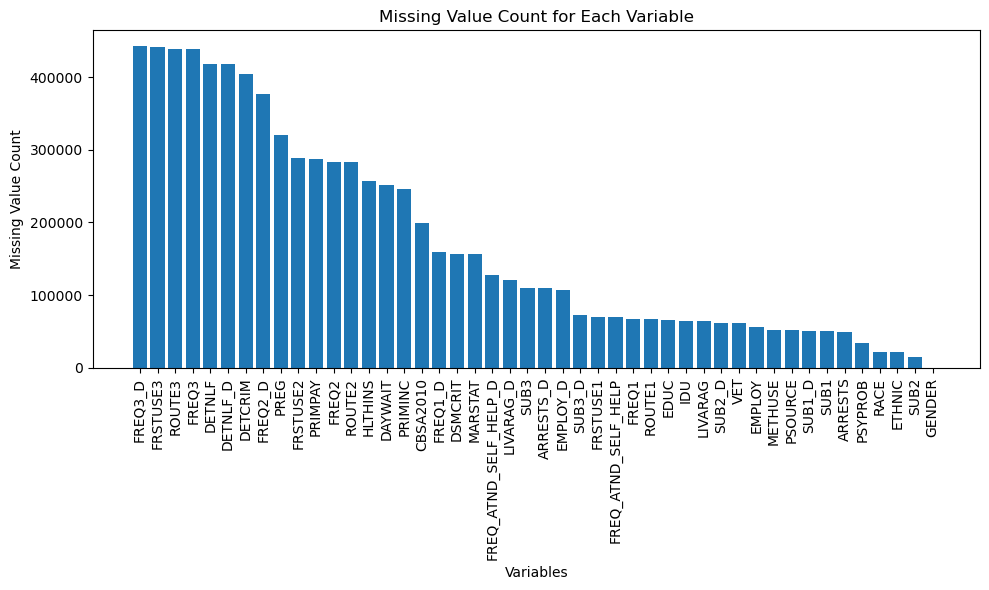

In [11]:
# Plotting these missing values by variable 

# Calculate missing value counts
missing_counts_no_prior = (teds_no_prior == -9).sum()

# Filter out variables with no missing values
missing_counts_no_prior = missing_counts_no_prior[missing_counts_no_prior > 0]

# Sort the missing value counts in descending order
missing_counts_no_prior = missing_counts_no_prior.sort_values(ascending=False)

# Create a bar plot for missing value counts
plt.figure(figsize=(10, 6))
plt.bar(missing_counts_no_prior.index, missing_counts_no_prior.values)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Count for Each Variable')
plt.tight_layout()
plt.show()


Records with missing data in any of the predictors, the outcome, or
characteristics used for determining inclusion in the study will be excluded from the analysis.

In [12]:
from tabulate import tabulate

In [13]:
# Examining the demographic characteristics and Outcome Variables
demographics = teds_no_prior[["GENDER", "AGE", "ETHNIC", "RACE", "EDUC", "MARSTAT"]]

# Create separate crosstab tables for each demographic variable
for col in demographics.columns:
    crosstab_result = pd.crosstab(index=teds_no_prior[col], columns=teds_no_prior['REASON'])
    print(f"Crosstab for {col} and REASON:\n")
    print(crosstab_result)
    print("\n" + "-"*50 + "\n")


Crosstab for GENDER and REASON:

REASON       1      2      3      4     5    6      7
GENDER                                               
-9          56    167      8     53     2    0      9
 1      124819  77554  12635  83913  3422  767  12172
 2       68286  49456   6779  53734  1081  385   7809

--------------------------------------------------

Crosstab for AGE and REASON:

REASON      1      2     3      4    5    6     7
AGE                                              
1        1578   1302   264    784   58    3   709
2        6181   5277  1034   2513  249   20  1819
3        7662   5501  1059   2890  232   17   948
4       16963  12196  2293  10146  523   51  1900
5       31400  23209  3578  24089  880  127  3116
6       31852  22704  3279  26000  813  135  3150
7       26583  17461  2558  22171  625  121  2457
8       19189  12052  1769  15872  403   98  1746
9       15018   8641  1216  11344  281   93  1298
10      13765   7735  1030   9941  193  127  1068
11      18884 

In [14]:
# URL to the PDF
pdf_url = "https://www.samhsa.gov/data/sites/default/files/reports/rpt35969/2020%20NSSATS%20State%20Profiles_FINAL.pdf"

# Download the PDF content
response = requests.get(pdf_url)
pdf_content = response.content

# Create a PyPDF2 PdfReader object
pdf_reader = PyPDF2.PdfReader(BytesIO(pdf_content))

# Extract text from all pages
all_text = ""
for page in pdf_reader.pages:
    all_text += page.extract_text()

# Use regular expression to find the number of facilities
facility_pattern = r"In\s+([\w\s]+?),\s+(\d+)\s+substance abuse treatment facilities were included"
facility_matches = re.findall(facility_pattern, all_text)

# Create a list of dictionaries to store data
data = []
for match in facility_matches:
    state_name, facilities_surveyed = match
    state_name = state_name.strip()  # Remove leading and trailing whitespace
    facilities_surveyed = int(facilities_surveyed)

    data.append({
        "state": state_name,
        "facilities_surveyed": facilities_surveyed
    })

# Create a DataFrame from the list of dictionaries
facilities_by_state = pd.DataFrame(data)

# Print the DataFrame
print(facilities_by_state)


                       state  facilities_surveyed
0                    Alabama                  155
1                     Alaska                  105
2                    Arizona                  447
3                   Arkansas                  171
4                   Colorado                  393
5              Conn\necticut                  210
6                   Delaware                   49
7   the District of Columbia                   28
8                    Georgia                  348
9                      Idaho                  110
10                  Illinois                  713
11                   Indiana                  416
12                      Iowa                  185
13                    Kansas                  170
14                  Kentucky                  477
15                 Louisiana                  155
16                     Maine                  196
17                  Maryland                  432
18             Massachusetts                  440


In [15]:
# Rename the states
facilities_by_state["state"] = facilities_by_state["state"].replace("Conn\necticut", "Connecticut")
facilities_by_state["state"] = facilities_by_state["state"].replace("the District of Columbia", "District of Columbia")

facilities_by_state

,state,facilities_surveyed
0,Alabama,155
1,Alaska,105
2,Arizona,447
3,Arkansas,171
4,Colorado,393
5,Connecticut,210
6,Delaware,49
7,District of Columbia,28
8,Georgia,348
9,Idaho,110


In [16]:
# Data for California, Florida, and Hawaii
data_other_facilities = [
    {"state": "California", "facilities_surveyed": 1734},
    {"state": "Florida", "facilities_surveyed": 712},
    {"state": "Hawaii", "facilities_surveyed": 161}
]

# Create a DataFrame from the additional data
other_facilities_df = pd.DataFrame(data_other_facilities)

In [17]:
# Append the dataframes
combined_facilities_df = facilities_by_state.append(other_facilities_df, ignore_index=True)

# Print the combined DataFrame
print(combined_facilities_df)


                   state  facilities_surveyed
0                Alabama                  155
1                 Alaska                  105
2                Arizona                  447
3               Arkansas                  171
4               Colorado                  393
5            Connecticut                  210
6               Delaware                   49
7   District of Columbia                   28
8                Georgia                  348
9                  Idaho                  110
10              Illinois                  713
11               Indiana                  416
12                  Iowa                  185
13                Kansas                  170
14              Kentucky                  477
15             Louisiana                  155
16                 Maine                  196
17              Maryland                  432
18         Massachusetts                  440
19              Michigan                  455
20             Minnesota          

C:\Users\patri\AppData\Local\Temp\ipykernel_1168\2940335706.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_facilities_df = facilities_by_state.append(other_facilities_df, ignore_index=True)


In [18]:
# URL to the PDF
pdf_url = "https://www.samhsa.gov/data/sites/default/files/reports/rpt35969/2020%20NSSATS%20State%20Profiles_FINAL.pdf"

# Download the PDF content
response = requests.get(pdf_url)
pdf_content = response.content

# Create a PyPDF2 PdfReader object
pdf_reader = PyPDF2.PdfReader(BytesIO(pdf_content))

# Extract text from all pages
all_text = ""
for page in pdf_reader.pages:
    all_text += page.extract_text()

# Use regular expression to find the survey response rate
response_rate_pattern = r"The survey response rate in ([\w\s]+) was ([\d.]+) percent"
response_rate_matches = re.findall(response_rate_pattern, all_text)

# Create a list of dictionaries to store data
data = []
for match in response_rate_matches:
    state_name, response_rate = match
    state_name = state_name.strip()  # Remove leading and trailing whitespace
    response_rate = float(response_rate)  # Convert to float

    data.append({
        "state": state_name,
        "response rate": response_rate
    })

# Create a DataFrame from the list of dictionaries
response_rates = pd.DataFrame(data)

# Print the DataFrame
print(response_rates)


             state  response rate
0          Alabama           92.9
1           Alaska           99.1
2          Arizona           88.7
3         Arkansas           96.7
4       California           85.8
5         Colorado           85.6
6      Connecticut           90.6
7         Delaware           90.6
8          Florida           89.1
9          Georgia           88.9
10          Hawaii           97.0
11           Idaho           86.8
12        Illinois           93.4
13         Indiana           91.2
14            Iowa           96.4
15          Kansas           94.5
16        Kentucky           89.2
17       Louisiana           93.5
18           Maine           85.4
19        Maryland           86.8
20   Massachusetts           89.7
21        Michigan           92.0
22       Minnesota           90.8
23     Mississippi           93.8
24        Missouri           92.7
25         Montana           87.8
26        Nebraska           96.1
27          Nevada           90.2
28   New Hamps

In [19]:
# Append the data for the District of Columbia
response_rates = response_rates.append({"state": "District of Columbia", "response rate": 87.9}, ignore_index=True)

# Print the updated response_rates DataFrame
print(response_rates)


                   state  response rate
0                Alabama           92.9
1                 Alaska           99.1
2                Arizona           88.7
3               Arkansas           96.7
4             California           85.8
5               Colorado           85.6
6            Connecticut           90.6
7               Delaware           90.6
8                Florida           89.1
9                Georgia           88.9
10                Hawaii           97.0
11                 Idaho           86.8
12              Illinois           93.4
13               Indiana           91.2
14                  Iowa           96.4
15                Kansas           94.5
16              Kentucky           89.2
17             Louisiana           93.5
18                 Maine           85.4
19              Maryland           86.8
20         Massachusetts           89.7
21              Michigan           92.0
22             Minnesota           90.8
23           Mississippi           93.8


C:\Users\patri\AppData\Local\Temp\ipykernel_1168\1903819976.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_rates = response_rates.append({"state": "District of Columbia", "response rate": 87.9}, ignore_index=True)


In [20]:
# Merge the DataFrames using an outer join
merged_facilities_count = combined_facilities_df.merge(response_rates, on="state", how="outer")


# Print the merged DataFrame
print(merged_facilities_count)

                   state  facilities_surveyed  response rate
0                Alabama                  155           92.9
1                 Alaska                  105           99.1
2                Arizona                  447           88.7
3               Arkansas                  171           96.7
4               Colorado                  393           85.6
5            Connecticut                  210           90.6
6               Delaware                   49           90.6
7   District of Columbia                   28           87.9
8                Georgia                  348           88.9
9                  Idaho                  110           86.8
10              Illinois                  713           93.4
11               Indiana                  416           91.2
12                  Iowa                  185           96.4
13                Kansas                  170           94.5
14              Kentucky                  477           89.2
15             Louisiana

In [21]:
# Estimated number of treatment facilities per state

merged_facilities_count["total_treatment_facilities"] = merged_facilities_count["facilities_surveyed"] / (merged_facilities_count["response rate"] / 100)

# Rounding the Total_Treatment_Facility column to the nearest whole number
merged_facilities_count["total_treatment_facilities"] = merged_facilities_count["total_treatment_facilities"].round()

# Printing the updated merged DataFrame
merged_facilities_count



,state,facilities_surveyed,response rate,total_treatment_facilities
0,Alabama,155,92.9,167.0
1,Alaska,105,99.1,106.0
2,Arizona,447,88.7,504.0
3,Arkansas,171,96.7,177.0
4,Colorado,393,85.6,459.0
5,Connecticut,210,90.6,232.0
6,Delaware,49,90.6,54.0
7,District of Columbia,28,87.9,32.0
8,Georgia,348,88.9,391.0
9,Idaho,110,86.8,127.0


In [22]:
# Merging teds dataset with population data and facility count data

teds_no_prior.head()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,Missing_Percentage
0,2020,1243074,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,9,4,0,3,5.263158
1,2020,1168758,2,-9,3,2,7,-9,29,1,...,0,0,0,0,0,9,4,0,1,15.789474
2,2020,1150846,2,-9,1,1,7,-9,36,1,...,0,0,0,0,0,9,4,0,3,9.210526
6,2020,1098248,2,-9,4,1,7,-9,35,1,...,0,0,0,0,1,9,4,0,3,11.842105
7,2020,1193448,2,-9,4,2,7,-9,35,1,...,0,0,0,0,0,9,4,0,2,15.789474


In [23]:
# Using fips code from codebook to create a state column in teds dataset

# Creating a mapping of FIPS codes to state names
fips_to_state = {
    1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California", 8: "Colorado", 9: "Connecticut",
    10: "Delaware", 11: "District of Columbia", 12: "Florida", 13: "Georgia", 15: "Hawaii", 17: "Illinois",
    18: "Indiana", 19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Louisiana", 23: "Maine", 25: "Massachusetts",
    26: "Michigan", 27: "Minnesota", 28: "Mississippi", 29: "Missouri", 30: "Montana", 31: "Nebraska",
    32: "Nevada", 33: "New Hampshire", 34: "New Jersey", 36: "New York", 37: "North Carolina", 38: "North Dakota",
    39: "Ohio", 40: "Oklahoma", 42: "Pennsylvania", 44: "Rhode Island", 45: "South Carolina",
    46: "South Dakota", 47: "Tennessee", 48: "Texas", 50: "Vermont", 51: "Virginia", 53: "Washington",
    55: "Wisconsin", 56: "Wyoming", 72: "Puerto Rico"
}

# Using the map() function to create the "state" column
teds_no_prior["state"] = teds_no_prior["STFIPS"].map(fips_to_state)

# Print the resulting DataFrame
print(teds_no_prior.head())


C:\Users\patri\AppData\Local\Temp\ipykernel_1168\1139345015.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teds_no_prior["state"] = teds_no_prior["STFIPS"].map(fips_to_state)


   DISYR   CASEID  STFIPS  CBSA2010  EDUC  MARSTAT  SERVICES  DETCRIM  LOS  \
0   2020  1243074       2        -9     3        1         7       -9   35   
1   2020  1168758       2        -9     3        2         7       -9   29   
2   2020  1150846       2        -9     1        1         7       -9   36   
6   2020  1098248       2        -9     4        1         7       -9   35   
7   2020  1193448       2        -9     4        2         7       -9   35   

   PSOURCE  ...  SEDHPFLG  INHFLG  OTCFLG  OTHERFLG  DIVISION  REGION  IDU  \
0        1  ...         0       0       0         0         9       4    0   
1        1  ...         0       0       0         0         9       4    0   
2        1  ...         0       0       0         0         9       4    0   
6        1  ...         0       0       0         1         9       4    0   
7        1  ...         0       0       0         0         9       4    0   

   ALCDRUG  Missing_Percentage   state  
0        3           

In [24]:
#reading states population data
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

# Selecting the first dataframe on website
usa_states = usa_states[0]
usa_states.head()

#Using the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's and
# Setting the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
#respectively.
usa_states_pop = usa_states.iloc[:, [0,5,6]].copy()
usa_states_pop.columns = ['state', 'state_population', 'state_area_sq_miles']

#fixing misspelt states
usa_states_pop.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_pop.state[usa_states_pop.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]
usa_states_pop["state"] = usa_states_pop["state"].replace("Hawaiʻi", "Hawaii")

#Adding Puerto Rio and District of Columbia
usa_states_pop = usa_states_pop.append([
    {"state": "Puerto Rico", "state_population": 3285874, "state_area_sq_miles":5320 },
    {"state": "District of Columbia", "state_population": 689545, "state_area_sq_miles": 61.13}
], ignore_index=True)

usa_states_pop.head()

C:\Users\patri\AppData\Local\Temp\ipykernel_1168\71756799.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  usa_states_pop = usa_states_pop.append([


,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420.0
1,Alaska,731545,665384.0
2,Arizona,7278717,113990.0
3,Arkansas,3017804,53179.0
4,California,39512223,163695.0


In [25]:
# Merging state facilty count and state population data to treatment data

teds_merged = teds_no_prior.merge(merged_facilities_count, on="state", how="left")

# Merge teds_merged with usa_states_pop on "state" column
teds_no_prior_state_pop = teds_merged.merge(usa_states_pop, on="state", how="left")

# Print the final DataFrame
print(teds_no_prior_state_pop.head())


   DISYR   CASEID  STFIPS  CBSA2010  EDUC  MARSTAT  SERVICES  DETCRIM  LOS  \
0   2020  1243074       2        -9     3        1         7       -9   35   
1   2020  1168758       2        -9     3        2         7       -9   29   
2   2020  1150846       2        -9     1        1         7       -9   36   
3   2020  1098248       2        -9     4        1         7       -9   35   
4   2020  1193448       2        -9     4        2         7       -9   35   

   PSOURCE  ...  REGION  IDU  ALCDRUG  Missing_Percentage   state  \
0        1  ...       4    0        3            5.263158  Alaska   
1        1  ...       4    0        1           15.789474  Alaska   
2        1  ...       4    0        3            9.210526  Alaska   
3        1  ...       4    0        3           11.842105  Alaska   
4        1  ...       4    0        2           15.789474  Alaska   

   facilities_surveyed  response rate  total_treatment_facilities  \
0                  105           99.1          

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503107 entries, 0 to 503106
Data columns (total 83 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DISYR                       503107 non-null  int64  
 1   CASEID                      503107 non-null  int64  
 2   STFIPS                      503107 non-null  int64  
 3   CBSA2010                    503107 non-null  int64  
 4   EDUC                        503107 non-null  int64  
 5   MARSTAT                     503107 non-null  int64  
 6   SERVICES                    503107 non-null  int64  
 7   DETCRIM                     503107 non-null  int64  
 8   LOS                         503107 non-null  int64  
 9   PSOURCE                     503107 non-null  int64  
 10  NOPRIOR                     503107 non-null  int64  
 11  ARRESTS                     503107 non-null  int64  
 12  EMPLOY                      503107 non-null  int64  
 13  METHUSE       

In [29]:
# Drop the "missing_percentage" column
teds_no_prior_state_pop.drop("Missing_Percentage", axis=1, inplace=True)



In [41]:
# Replace -9 as missing
teds_no_prior_state_pop.replace(-9, np.nan, inplace=True)


In [42]:
#Dropping columns with missing data
teds_no_prior_state_pop_complete = teds_no_prior_state_pop.dropna(axis=1)
teds_no_prior_state_pop_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503107 entries, 0 to 503106
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DISYR                       503107 non-null  int64  
 1   CASEID                      503107 non-null  int64  
 2   STFIPS                      503107 non-null  int64  
 3   SERVICES                    503107 non-null  int64  
 4   LOS                         503107 non-null  int64  
 5   NOPRIOR                     503107 non-null  int64  
 6   SERVICES_D                  503107 non-null  int64  
 7   REASON                      503107 non-null  int64  
 8   AGE                         503107 non-null  int64  
 9   ALCFLG                      503107 non-null  int64  
 10  COKEFLG                     503107 non-null  int64  
 11  MARFLG                      503107 non-null  int64  
 12  HERFLG                      503107 non-null  int64  
 13  METHFLG       

In [44]:
# Save final files

teds_no_prior_state_pop_complete.to_csv("C:/Users/patri/Desktop/Capstone 2 - Predicting Treatment Success/data/teds_no_prior_state_pop_complete.csv", index=False)


# Summary

Data related to substance abuse treatment facilities across the United States was acquired from the Substance Abuse and Mental Health Services Administration (SAMHSA) website. Specifically, the Treatment Episode Data Set-D (TEDS-D) for the year 2020 was utilized for analysis. TEDS-D encompasses admission and discharge data, reflecting treatment episodes rather than individual cases.

The focus of the analysis was on records indicating individuals without prior Substance Use Disorder (SUD) treatment. Consequently, only these specific records were considered. Additional data on the count of treatment facilities was gathered, along with population information. These datasets were subsequently merged with the discharge data. The initial dataset contained 76 variables and 1,391,393 records.

Variables such as DETCRM, FREQ3_D, DETNLF, FREQ2, and PREQ exhibited the highest rate of missing values. Given that the dataset pertained to treatment episodes rather than individual instances, it was streamlined to retain unique cases only. This resulted in a dataset featuring 503,107 distinct individuals.

Data regarding the number of treatment facilities and response rates was extracted from PDF reports. Utilizing response rates and the number of facilities surveyed, the total count of facilities for each state was computed. Additionally, population statistics and geographical details were sourced from Wikipedia. After data cleaning and merging based on states, the final dataset was composed of 503,107 rows and 82 columns, effectively capturing a comprehensive overview of substance abuse treatment episodes across states.